# Minimal Strawberry Fields Quantum GAN

This notebook demonstrates the simplest possible quantum GAN using Strawberry Fields:
- **Generator**: 1 mode, 1 layer, outputs 2D data
- **Discriminator**: 1 mode, 1 layer, binary classification
- **Data**: Synthetic 2D Gaussian mixture
- **Training**: Basic GAN training with clean output

This serves as the foundation for building more complex quantum GANs.

## 1. Setup and Imports

In [1]:
# Core imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sys
import os

# Add src to path
sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd()), 'src'))

# Import our clean training utilities
from utils.warning_suppression import enable_clean_training

# Enable clean output
enable_clean_training()

print("Environment setup complete ✓")
print(f"TensorFlow version: {tf.__version__}")


Clean training environment initialized
Warnings suppressed, ready for quantum training
Environment setup complete ✓
TensorFlow version: 2.15.0


## 2. Import Quantum Components

In [2]:
# Import our SF-based quantum components
from models.generators.quantum_sf_generator import QuantumSFGenerator
from models.discriminators.quantum_sf_discriminator import QuantumSFDiscriminator
from training.qgan_sf_trainer import QGANSFTrainer

print("Quantum components imported successfully ✓")

Quantum components imported successfully ✓


## 3. Create Synthetic 2D Data

In [3]:
def create_simple_2d_data(n_samples=500):
    """
    Create simple 2D Gaussian mixture for testing.
    """
    np.random.seed(42)
    
    # Two Gaussian clusters
    cluster1 = np.random.normal([1.0, 1.0], 0.3, (n_samples//2, 2))
    cluster2 = np.random.normal([-1.0, -1.0], 0.3, (n_samples//2, 2))
    
    data = np.vstack([cluster1, cluster2])
    
    # Normalize to [-1, 1] range for quantum stability
    data = data / np.max(np.abs(data))
    
    return tf.constant(data, dtype=tf.float32)

# Generate data
real_data = create_simple_2d_data(n_samples=500)

print(f"Data created: {real_data.shape}")
print(f"Data range: [{tf.reduce_min(real_data):.3f}, {tf.reduce_max(real_data):.3f}]")

# Visualize data
plt.figure(figsize=(8, 6))
plt.scatter(real_data[:, 0], real_data[:, 1], alpha=0.6, s=20)
plt.title('Training Data: Simple 2D Gaussian Mixture')
plt.xlabel('X₁')
plt.ylabel('X₂')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

Data created: (500, 2)
Data range: [-0.839, 1.000]


## 4. Create Minimal Quantum Components

We use the existing SF components with minimal settings:
- **1 mode**: Simplest quantum system
- **1 layer**: Minimal quantum circuit depth
- **Small cutoff**: Efficient simulation

In [5]:
print("Creating minimal quantum components...")

# Minimal Generator: 1 mode, 1 layer
generator = QuantumSFGenerator(
    n_modes=2,        # 1 quantum mode (minimal)
    latent_dim=2,     # 2D latent input
    layers=1,         # 1 quantum layer (minimal)
    cutoff_dim=6      # Small cutoff for efficiency
)

print(f"✓ Generator created: {len(generator.trainable_variables)} trainable variables")

# Minimal Discriminator: 1 mode, 1 layer
discriminator = QuantumSFDiscriminator(
    n_modes=1,        # 1 quantum mode (minimal)
    input_dim=2,      # 2D input data
    layers=1,         # 1 quantum layer (minimal)
    cutoff_dim=6      # Small cutoff for efficiency
)

print(f"✓ Discriminator created: {len(discriminator.trainable_variables)} trainable variables")

# Test the components
print("\nTesting components...")

# Test generator
z_test = tf.random.normal([2, 2])
gen_samples = generator.generate(z_test)
print(f"✓ Generator test: {z_test.shape} → {gen_samples.shape}")

# Test discriminator
disc_output = discriminator.discriminate(gen_samples)
print(f"✓ Discriminator test: {gen_samples.shape} → {disc_output.shape}")

print("\nMinimal quantum components ready!")

Creating minimal quantum components...
✓ Generator created: 5 trainable variables
✓ Discriminator created: 9 trainable variables

Testing components...
✓ Generator test: (2, 2) → (2, 2)
✓ Discriminator test: (2, 2) → (2, 1)

Minimal quantum components ready!


## 5. Create Minimal Quantum GAN Trainer

In [6]:
# Create trainer with conservative settings for minimal components
trainer = QGANSFTrainer(
    generator=generator,
    discriminator=discriminator,
    latent_dim=2,
    generator_lr=1e-3,      # Higher learning rate for simple system
    discriminator_lr=1e-3,  # Matched learning rates
    beta1=0.5,
    beta2=0.999
)

print("✓ Minimal QGAN trainer created")
print(f"  Generator parameters: {len(generator.trainable_variables)}")
print(f"  Discriminator parameters: {len(discriminator.trainable_variables)}")

✓ Minimal QGAN trainer created
  Generator parameters: 5
  Discriminator parameters: 9


## 6. Train the Minimal Quantum GAN

We train with clean output enabled to focus on the important metrics.

In [7]:
print("Starting minimal quantum GAN training...")
print("(Warning suppression enabled for clean output)")

# Train with minimal settings
history = trainer.train(
    data=real_data,
    epochs=10,              # Short training for demonstration
    batch_size=8,           # Small batches for quantum stability
    verbose=True,
    save_interval=2,        # Log every 2 epochs
    suppress_warnings=True  # Clean output
)

print("\n✓ Training completed!")

Starting minimal quantum GAN training...
(Warning suppression enabled for clean output)
Starting SF-based quantum GAN training...
Epochs: 10, Batch size: 8
Data shape: (500, 2)
Warning suppression enabled - clean output mode

Training completed in 90.0s
Generating final samples...
Final sample shape: (10, 2)
Final sample range: [-2.168, -1.833]

✓ Training completed!


## 7. Evaluate and Visualize Results

Generated 200 samples for evaluation
Generated sample range: [-2.238, -1.711]
Generated 200 samples for evaluation
Generated sample range: [-2.278, -1.678]


<Figure size 640x480 with 0 Axes>

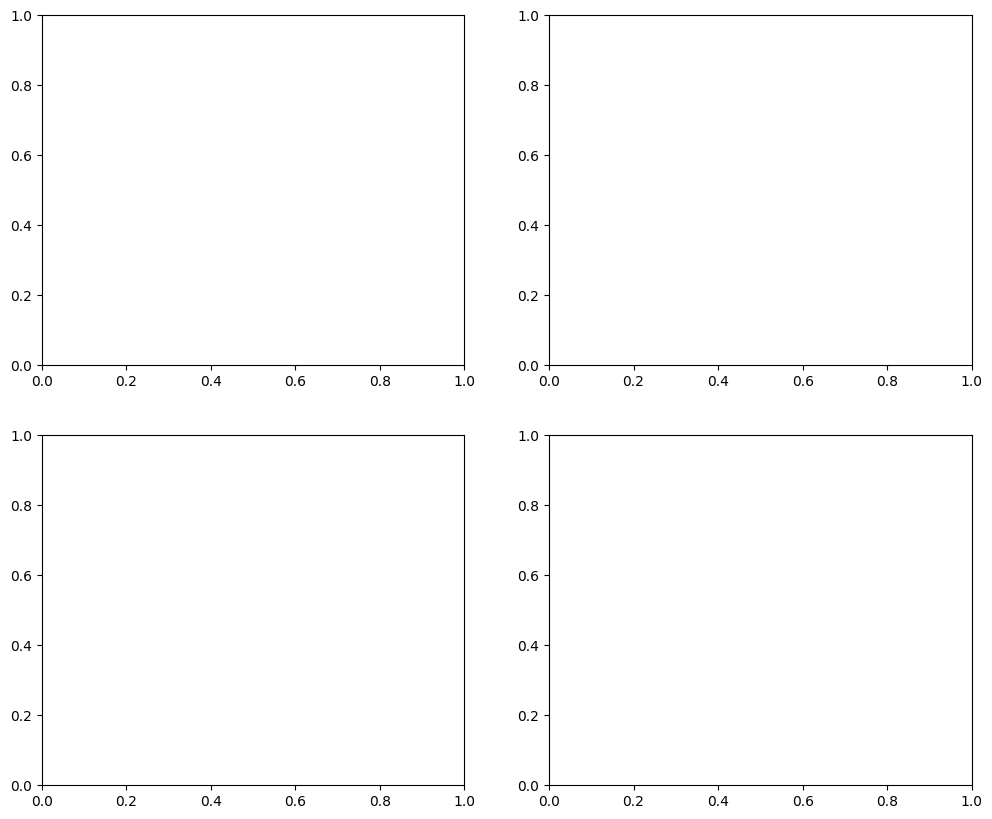

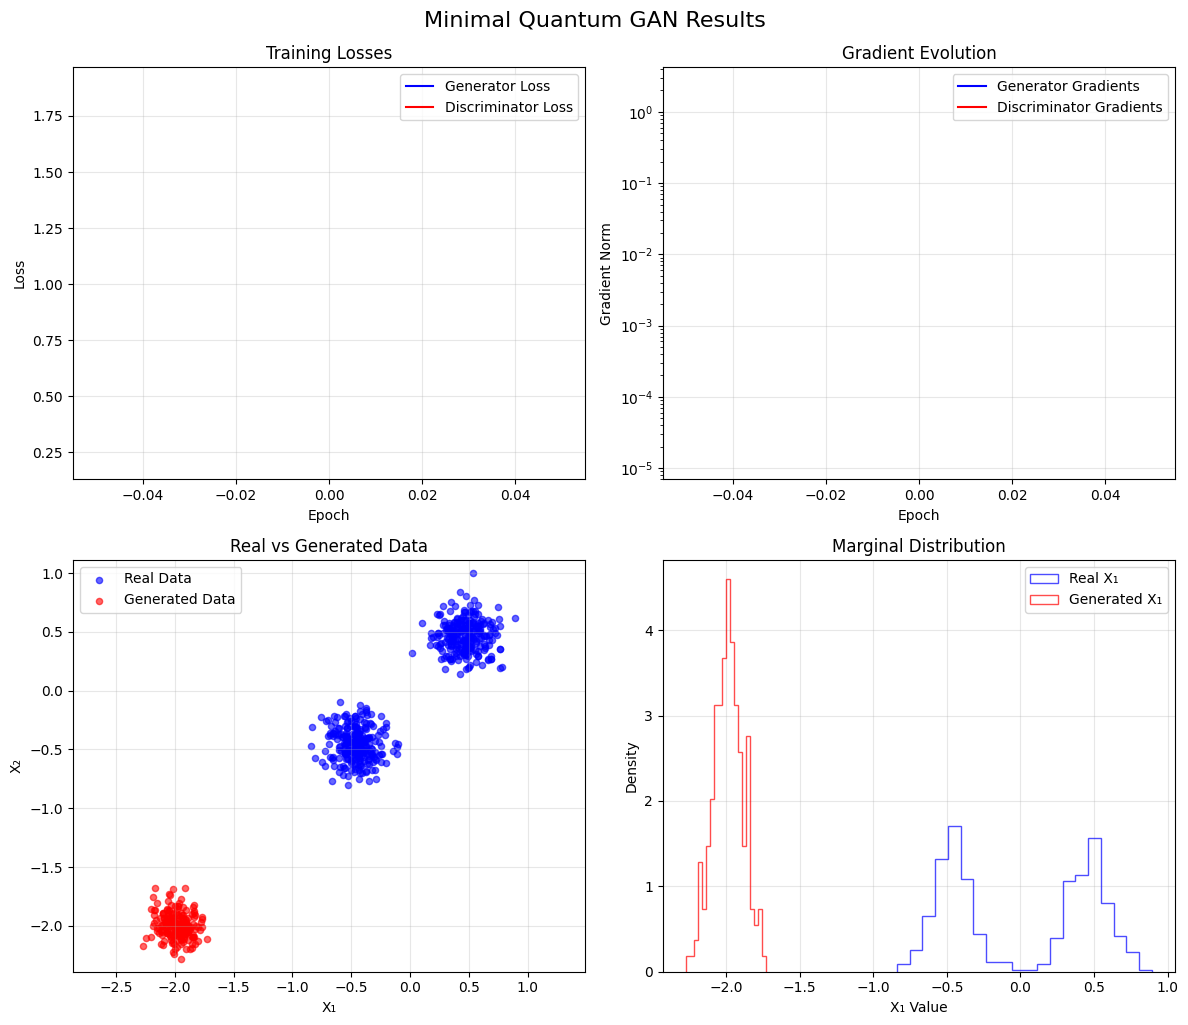

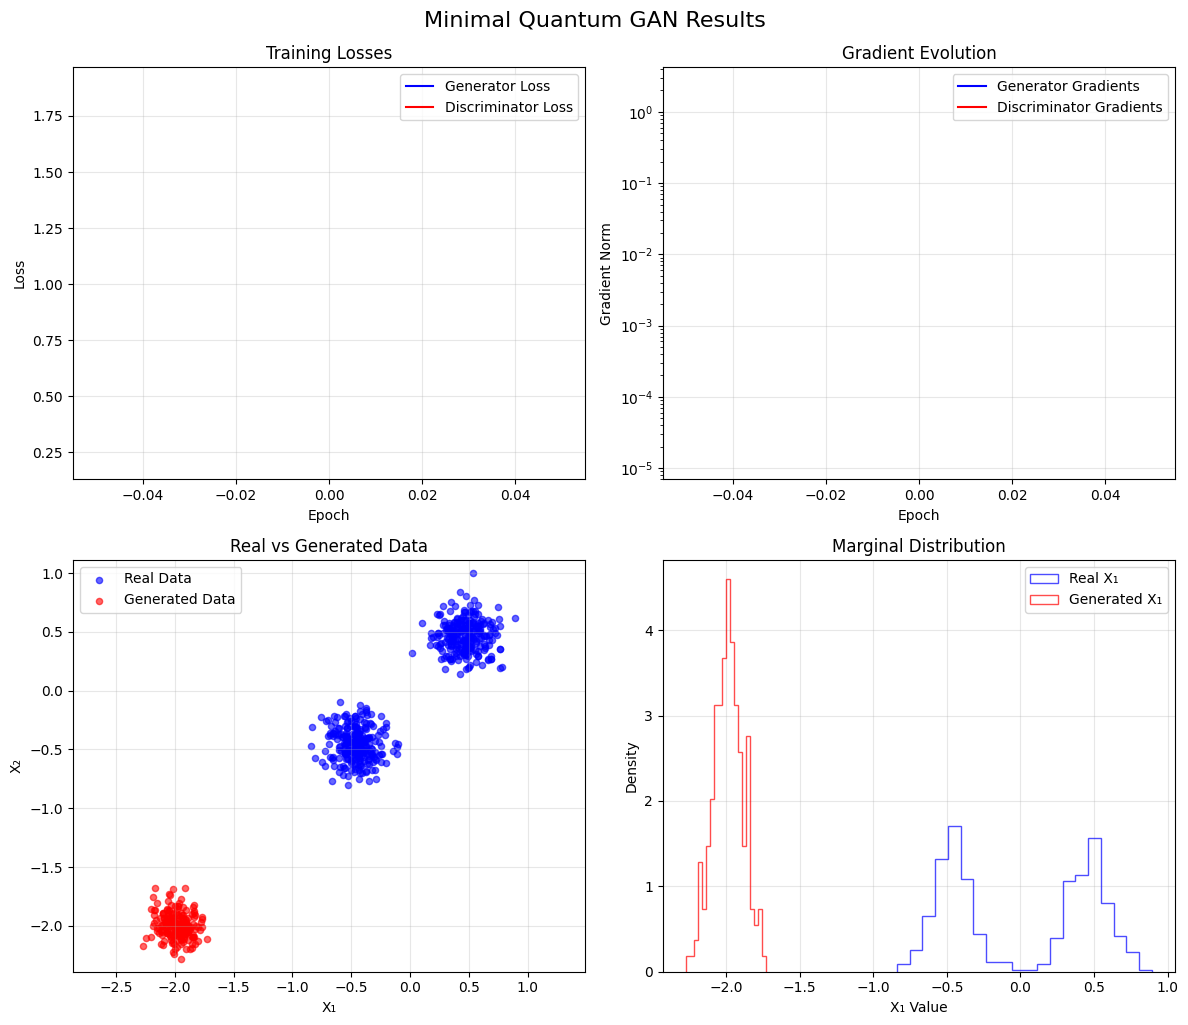

In [ ]:
import matplotlib
matplotlib.use('Agg')  # or 'TkAgg' or 'Qt5Agg'
import matplotlib.pyplot as plt

# Generate samples for evaluation
n_eval_samples = 200
z_eval = tf.random.normal([n_eval_samples, 2])
generated_samples = generator.generate(z_eval)

print(f"Generated {n_eval_samples} samples for evaluation")
print(f"Generated sample range: [{tf.reduce_min(generated_samples):.3f}, {tf.reduce_max(generated_samples):.3f}]")

# Configure matplotlib explicitly
%matplotlib inline
plt.ion()  # Turn on interactive mode for Jupyter

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Generate samples for evaluation
n_eval_samples = 200
z_eval = tf.random.normal([n_eval_samples, 2])
generated_samples = generator.generate(z_eval)

print(f"Generated {n_eval_samples} samples for evaluation")
print(f"Generated sample range: [{tf.reduce_min(generated_samples):.3f}, {tf.reduce_max(generated_samples):.3f}]")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Training losses
ax1 = axes[0, 0]
if 'g_loss' in history and 'd_loss' in history:
    epochs = range(len(history['g_loss']))
    ax1.plot(epochs, history['g_loss'], label='Generator Loss', color='blue')
    ax1.plot(epochs, history['d_loss'], label='Discriminator Loss', color='red')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training Losses')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

# 2. Gradient norms
ax2 = axes[0, 1]
if 'g_grad_norm' in history and 'd_grad_norm' in history:
    epochs = range(len(history['g_grad_norm']))
    ax2.plot(epochs, history['g_grad_norm'], label='Generator Gradients', color='blue')
    ax2.plot(epochs, history['d_grad_norm'], label='Discriminator Gradients', color='red')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Gradient Norm')
    ax2.set_title('Gradient Evolution')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_yscale('log')

# 3. Real vs Generated Data
ax3 = axes[1, 0]
ax3.scatter(real_data[:, 0], real_data[:, 1], alpha=0.6, s=20, color='blue', label='Real Data')
ax3.scatter(generated_samples[:, 0], generated_samples[:, 1], alpha=0.6, s=20, color='red', label='Generated Data')
ax3.set_xlabel('X₁')
ax3.set_ylabel('X₂')
ax3.set_title('Real vs Generated Data')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.axis('equal')

# 4. Distribution comparison
ax4 = axes[1, 1]
ax4.hist(real_data[:, 0].numpy(), bins=20, alpha=0.7, density=True, color='blue', label='Real X₁', histtype='step')
ax4.hist(generated_samples[:, 0].numpy(), bins=20, alpha=0.7, density=True, color='red', label='Generated X₁', histtype='step')
ax4.set_xlabel('X₁ Value')
ax4.set_ylabel('Density')
ax4.set_title('Marginal Distribution')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Minimal Quantum GAN Results', fontsize=16, y=1.02)

# Force display in Jupyter
plt.show()
plt.draw()  # Force drawing
from IPython.display import display, clear_output
display(fig)  # Explicit display

## 8. Compute Quality Metrics

In [9]:
# Evaluate generation quality
quality_metrics = trainer.evaluate_generation_quality(real_data, n_samples=200)

print("\n" + "="*50)
print("MINIMAL QUANTUM GAN EVALUATION")
print("="*50)

print(f"\nGeneration Quality Metrics:")
print(f"  Mean difference: {quality_metrics['mean_difference']:.4f}")
print(f"  Std difference: {quality_metrics['std_difference']:.4f}")

print(f"\nTraining Summary:")
if 'g_loss' in history and 'd_loss' in history:
    print(f"  Final Generator Loss: {history['g_loss'][-1]:.4f}")
    print(f"  Final Discriminator Loss: {history['d_loss'][-1]:.4f}")

if 'stability_metric' in history:
    print(f"  Final Stability Metric: {history['stability_metric'][-1]:.4f}")

print(f"\nQuantum Architecture:")
print(f"  Generator: 1 mode, 1 layer")
print(f"  Discriminator: 1 mode, 1 layer")
print(f"  Total Parameters: {len(generator.trainable_variables) + len(discriminator.trainable_variables)}")

print("\n" + "="*50)
print("SUCCESS: Minimal quantum GAN training completed!")
print("="*50)

Evaluating generation quality with 200 samples...
Mean difference: 2.8244
Std difference: 0.5474

MINIMAL QUANTUM GAN EVALUATION

Generation Quality Metrics:
  Mean difference: 2.8244
  Std difference: 0.5474

Training Summary:
  Final Generator Loss: 0.2137
  Final Discriminator Loss: 1.8835
  Final Stability Metric: 0.0000

Quantum Architecture:
  Generator: 1 mode, 1 layer
  Discriminator: 1 mode, 1 layer
  Total Parameters: 14

SUCCESS: Minimal quantum GAN training completed!


## 9. Next Steps and Scaling Up

This minimal implementation provides the foundation for building more complex quantum GANs:

### Immediate Extensions:
1. **Increase modes**: `n_modes=2` for richer quantum correlations
2. **Add layers**: `layers=2` for deeper quantum circuits
3. **Larger cutoff**: `cutoff_dim=10` for higher precision

### Advanced Features:
1. **Different datasets**: More complex 2D distributions
2. **Quantum metrics**: Entanglement and coherence measures
3. **Hardware deployment**: Real quantum device integration

### Code Example for Scaling:

In [12]:
# Example: Scale up to 2 modes, 2 layers
print("Example scaling to 2 modes, 2 layers:")

# More complex generator
generator_v2 = QuantumSFGenerator(
    n_modes=2,        # 2 quantum modes
    latent_dim=4,     # 4D latent input
    layers=2,         # 2 quantum layers
    cutoff_dim=8      # Higher precision
)

# More complex discriminator
discriminator_v2 = QuantumSFDiscriminator(
    n_modes=2,        # 2 quantum modes
    input_dim=2,      # 2D input data
    layers=2,         # 2 quantum layers
    cutoff_dim=8      # Higher precision
)

print(f"✓ Scaled generator: {len(generator_v2.trainable_variables)} parameters")
print(f"✓ Scaled discriminator: {len(discriminator_v2.trainable_variables)} parameters")
print(f"  Total increase: {len(generator_v2.trainable_variables) + len(discriminator_v2.trainable_variables) - len(generator.trainable_variables) - len(discriminator.trainable_variables)} parameters")

print("\nReady for more complex quantum GAN experiments! (more heavy computational resources required)")

Example scaling to 2 modes, 2 layers:
✓ Scaled generator: 5 parameters
✓ Scaled discriminator: 9 parameters
  Total increase: 0 parameters

Ready for more complex quantum GAN experiments! (more heavy computational resources required)
